In [1]:
import numpy as np
import math
import random

# 주머니 속에 들어있는 공의 개수입니다. 숫자를 바꾸면서 실험해보세요!
total = 1000

#---------------#

count = 1   # 실험이 끝날 때까지 꺼낸 공의 개수

# 1부터 total까지의 정수 중에서 하나를 뽑고 total과 같으면 실험 종료
# total=1000인 경우 1~999: blue / 1000: red
while True:
    sample = random.randrange(1,total+1)
    if sample == total:
        break
    count += 1

print('number of blue samples: '+str(count-1))
print('information content: '+str(-math.log(1/count)))

number of blue samples: 7
information content: 2.0794415416798357


In [2]:
# 28-5 우선 아래 코드를 실행해 Q(x) 생성. 실제 환경에서는 Q(x)가 랜덤값으로 생성되는 것이 아니라 모델의 예측을 통해 얻게 된 값일 거예요. 
# 그러니 softmax_output이라는 변수를 사용

import numpy as np
import random

# generate random output
#-----------------#
# can be modified
class_num = 4
#-----------------#
q_vector = []
total = 1

for i in range(class_num-1):
    q = random.uniform(0,total)
    q_vector.append(round(q,3))
    total = total - q

q_vector.append(total)
softmax_output = np.array(q_vector)

print(softmax_output)

[0.759      0.04       0.112      0.08840104]


In [3]:
# 이제 P(x)P(x)를 생성해 Cross Entropy를 계산. 
# p_vector변수를 사용하는 P(x) 는 one-hot vector이므로 직접 class_index를 바꿔가며 확인해 볼 수 있어요.

#-----------------#
# can be modified
class_index = 1
#-----------------#

p_vector = np.zeros(class_num)
p_vector[class_index-1] = 1

cross_entropy = -np.sum(np.multiply(p_vector, np.log(softmax_output)))

print('model prediction: '+str(softmax_output))
print('data label: '+str(p_vector))
print('cross entropy: '+str(round(cross_entropy,4)))

model prediction: [0.759      0.04       0.112      0.08840104]
data label: [1. 0. 0. 0.]
cross entropy: 0.2758


In [ ]:
#28-6 의사결정트리 실행해보기
$ mkdir -p ~/aiffel/information_theory
$ ln -s ~/data/* ~/aiffel/information_theory

In [8]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [10]:
import os
csv_path = os.getenv('HOME')+'/aiffel/information_theory/diabetes.csv'

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
df = pd.read_csv(csv_path, header=0, names=col_names)
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# 데이터셋 준비
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = df[feature_cols] # Features
y = df.label  # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('슝=3')

슝=3


In [14]:
# Decision Tree 모델 학습
# Create Decision Tree Classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.683982683982684


Decision Tree를 아무 제약조건 없이 학습시켜 나온 결과 정확도는 66% 정도 됩니다.
Decsion Tree의 장점은 어떻게 모델이 이런 결과를 내었는지 분류 기준을 따져보고 시각화를 통한 원인 추적이 가능하다는 점입니다. 
다음과 같이 방금 학습시킨 Decision Tree 모델을 시각화해 보겠습니다.

생성된 이미지 파일이 꽤 크기 때문에 저장된 이미지를 직접 열어 확인해도 좋습니다. diabetes1.png로 저장됩니다.

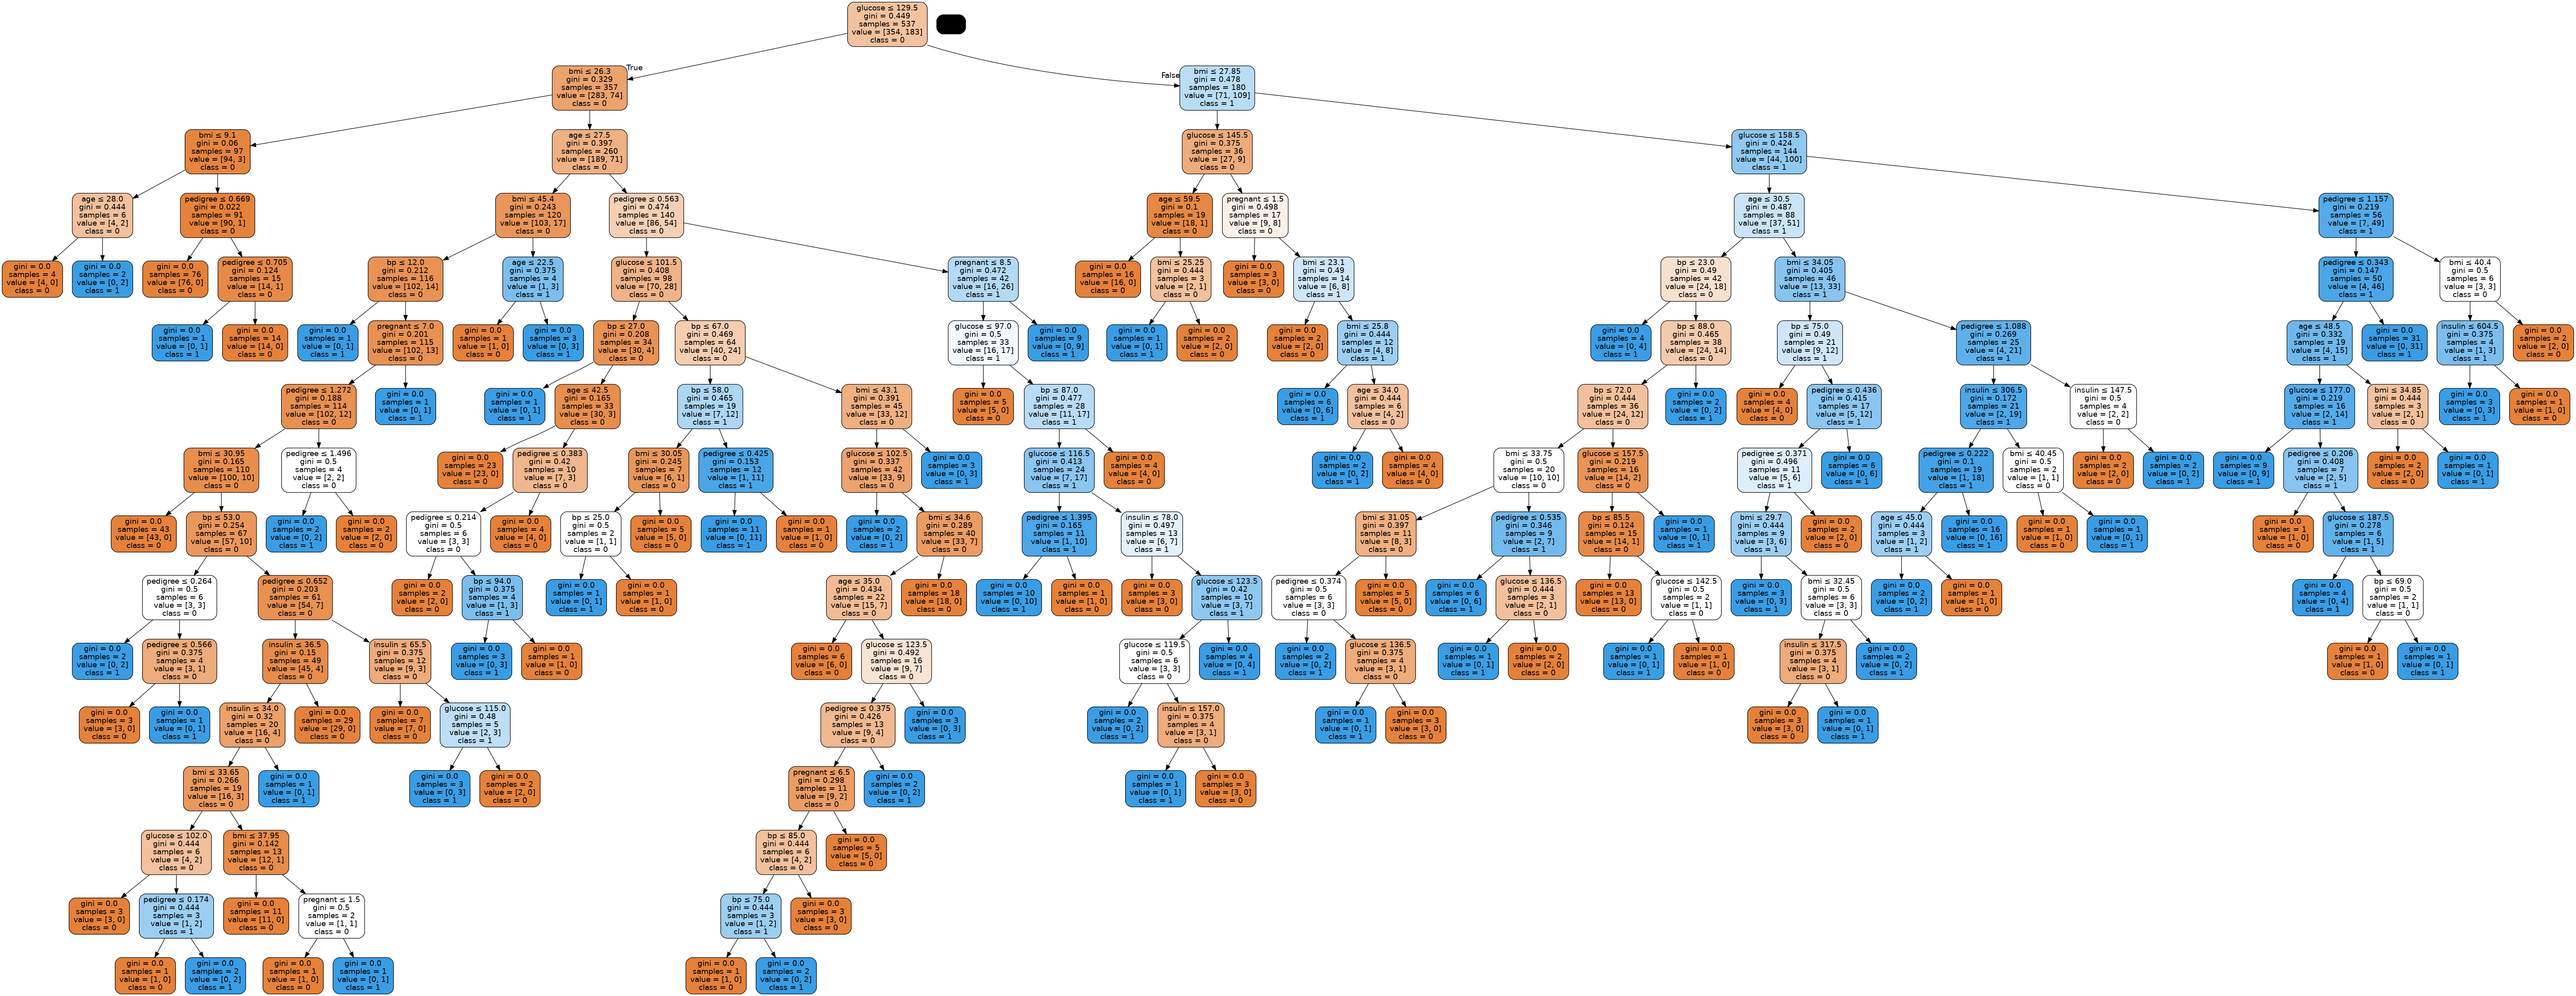

In [19]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  # Iphython.display는 Ipython 내에 정보를 보여주는 도구용도의 공용 API이다.
import pydotplus    #I Python.display API 모듈 중 Image는 원시(raw)데이터가 있는 png나 jpeg등의 이미지 객체를 만드는 모듈이다.
# pydotplus는 그래프를 생성하는 graphviz의 dot 언어를 파이썬 인터페이스 제공하는 모듈이다.

dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes1.png')
Image(graph.create_png(), retina=True)

여기서 사용한 정보의 총량은 얼마나 될까요? 
사용되지 않은 정보가 적을 수록 많은 정보를 사용한 것일 테니, 정보 이득이 되지 않은 Impurity를 측정해 봅시다.

In [20]:
# 정보 이득이 되지 않고 남은 Impurity 총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))


0.15339926842881257
0.14633934707314158


위 두 가지 사실을 볼 때 우리가 학습시킨 Decision Tree 는 정보 이득을 최대화할 수 있는 지점까지 극한적으로 많은 분류 기준을 적용한 경우임을 알 수 있었습니다.
그런데 이것이 과연 타당할까요?

비교 실험을 해 보겠습니다. 우리는 Decision Tree를 3depth 까지만 발전시켜 볼 것입니다.

In [21]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model  Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


어떤가요? 오히려 훨씬 Accuracy가 올라갔습니다. 이때의 트리구조 및 정보 이득이 되지 않은 남은 엔트로피(Impurity) 총량은 어떨까요?



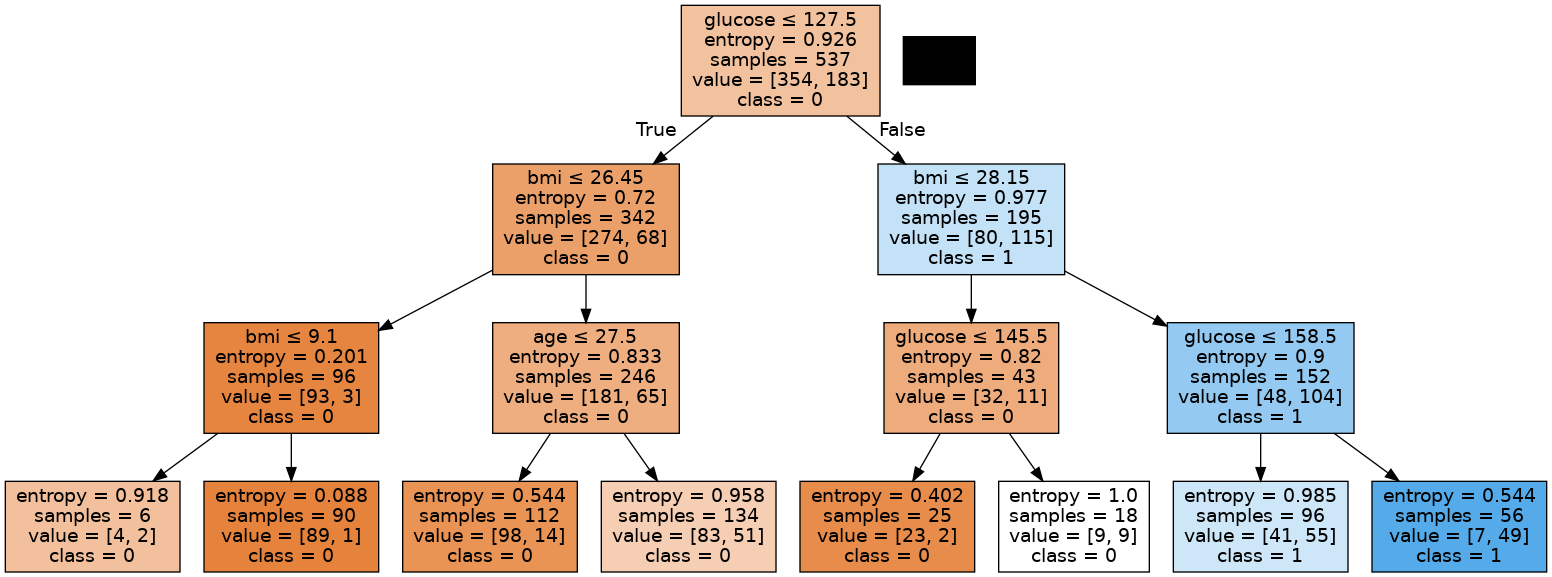

In [22]:
dot_data = StringIO()
export_graphviz(clf,
                out_file=dot_data,
                filled=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png(), retina=True)                      

In [24]:
# 정보이득이 되지 않고 남은 Impurity 총량 측정
ccp_path1 = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_path2 = clf.cost_complexity_pruning_path(X_test, y_test)
print(np.mean(ccp_path1.impurities))
print(np.mean(ccp_path2.impurities))

0.7474881472739515
0.6878691771636323
